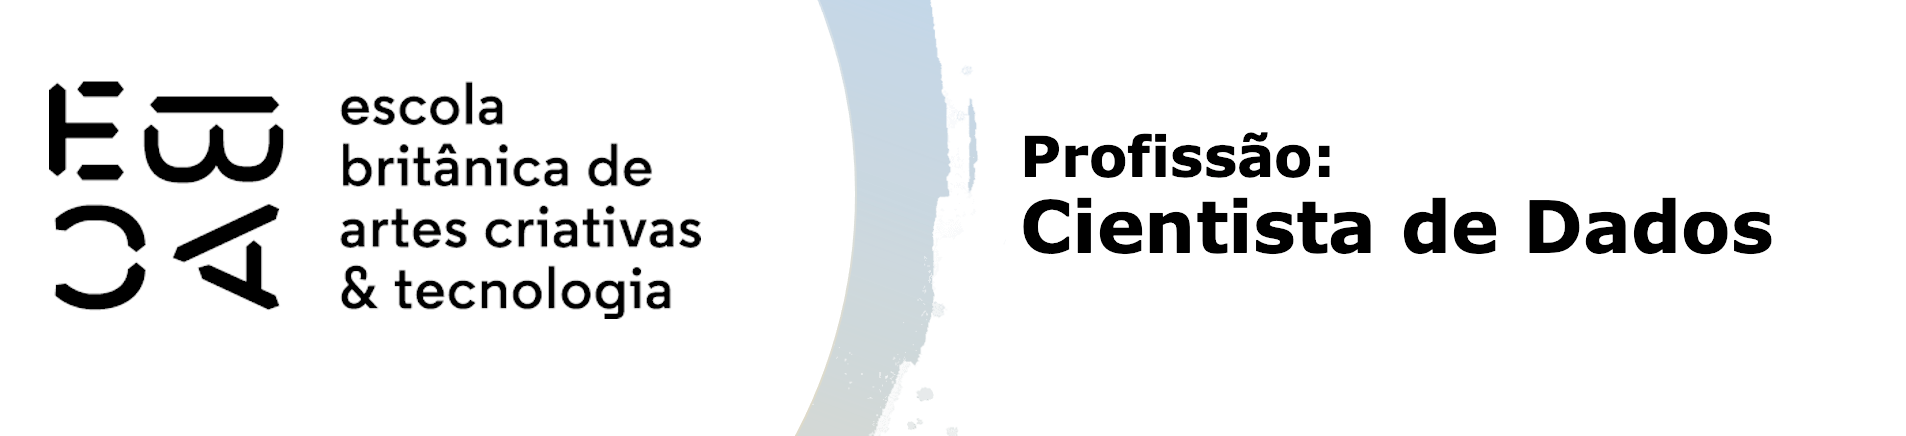

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [2]:
penguins = sns.load_dataset('penguins')
penguins.index.name = 'id'
penguins_num = penguins.select_dtypes(include='number').dropna()

In [3]:
pandronizador = StandardScaler()
penguins_pad = pandronizador.fit_transform(penguins_num)
#penguins_pad

In [4]:
clus = AgglomerativeClustering(n_clusters=3,
                              linkage='complete',
                              distance_threshold=None)

clus.fit(penguins_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [5]:
penguins_num['grupo_3'] = clus.labels_
# penguins_num

In [6]:
penguins = penguins.merge(penguins_num['grupo_3'], how='left', on='id')

In [7]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo_3
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0


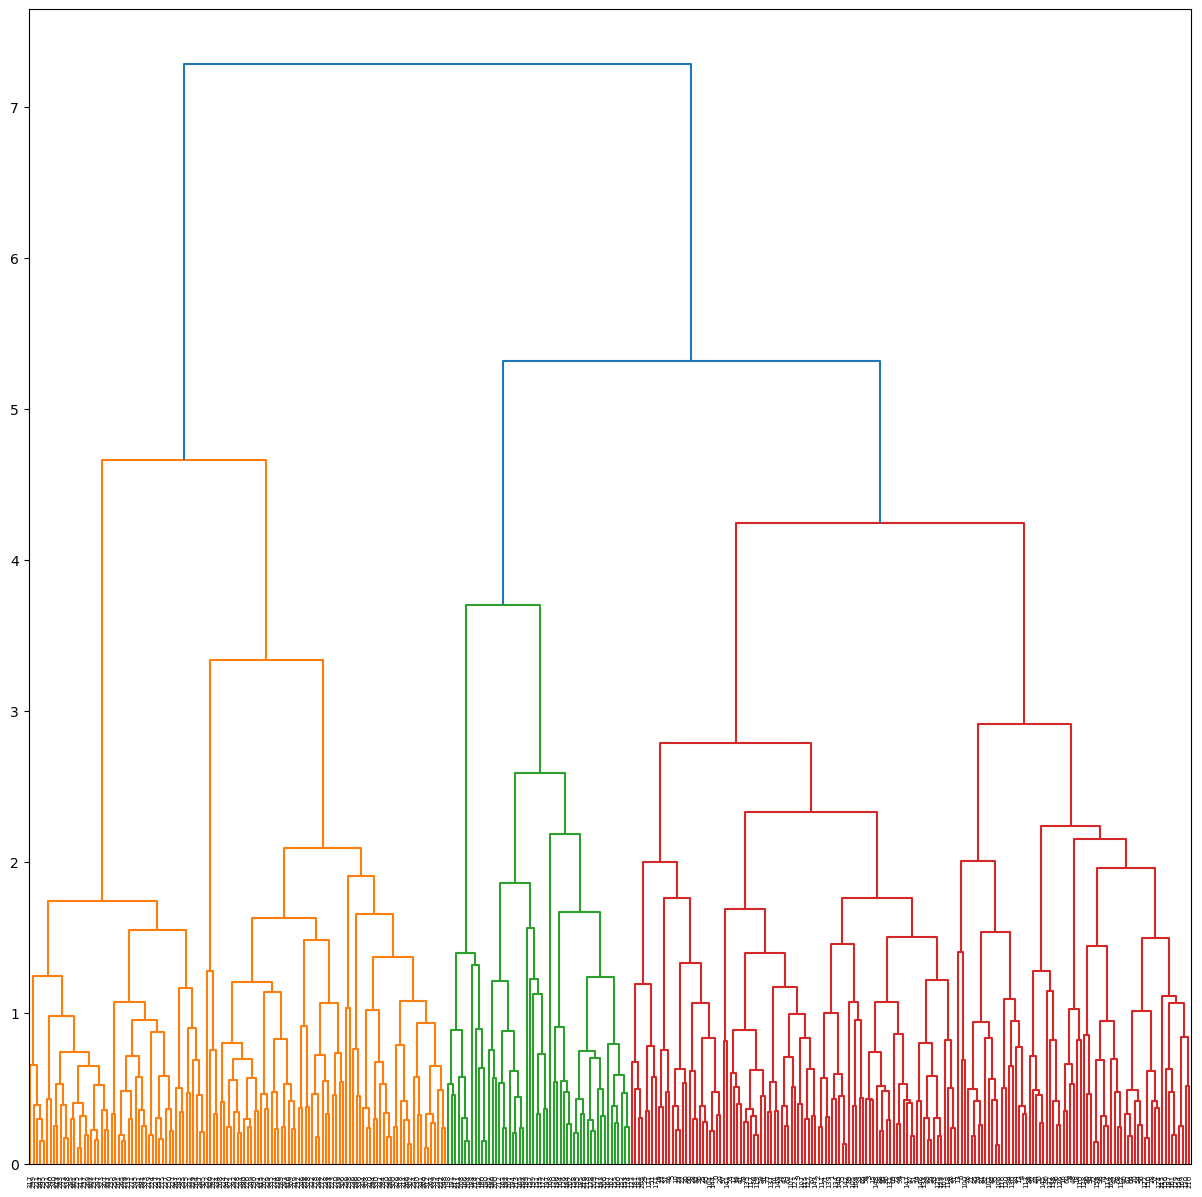

In [8]:
plt.figure(figsize=(15,15))

dend = shc.dendrogram(shc.linkage(penguins_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [9]:
pd.crosstab(penguins['species'], penguins['grupo_3'])

grupo_3,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


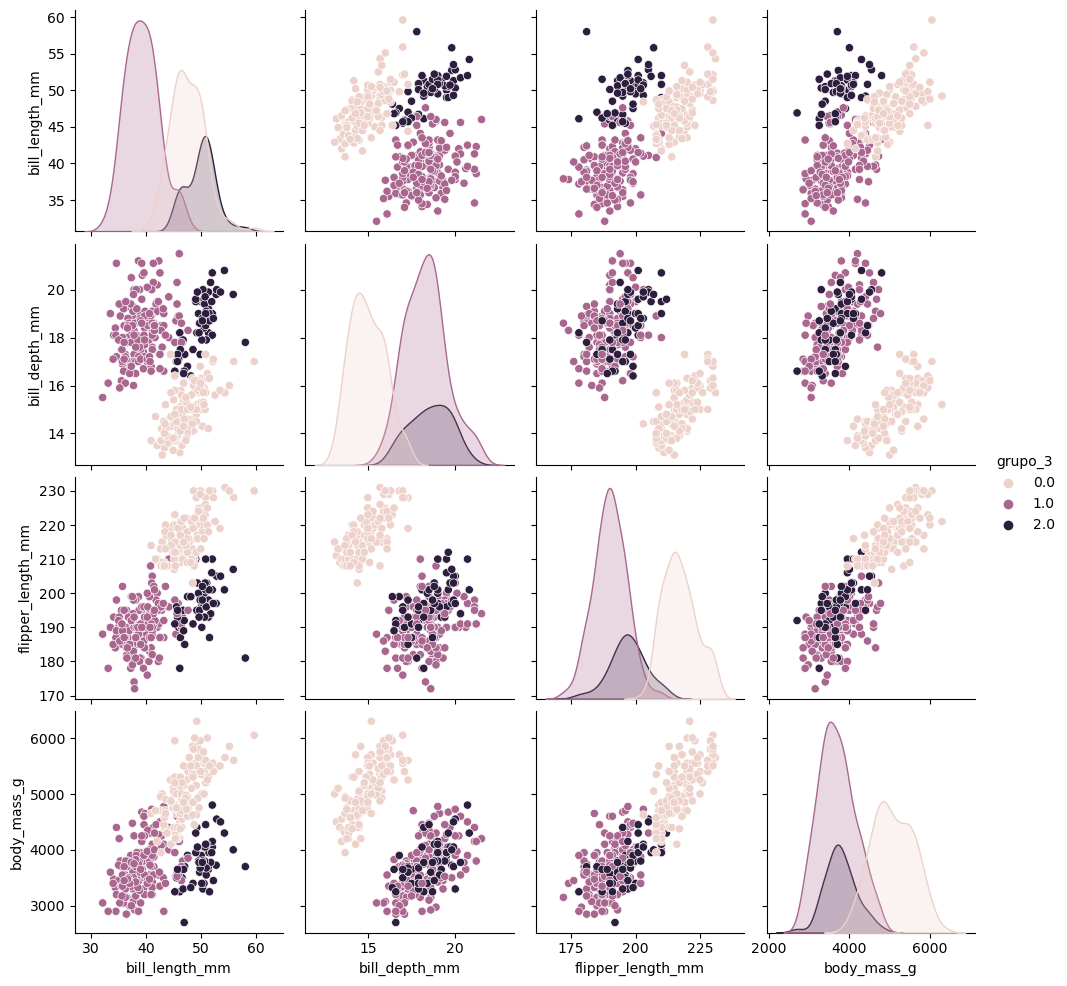

In [10]:
sns.pairplot(data=penguins, hue='grupo_3')

### Análise 3 Grupos:

 - A especie Gentoo esta bem definida pelo grupo 0.
 - A especie Adelie esta bem definida pelo grupo 1.
 - O grupo 2 tem dificuldade de definir a especie Chinstrap, mas ainda sim definiu bem.
 - A especie Gentoo é a que se diferencia mais das outras especies.
 - As especies Chinstrap e Adelie se parecem, relacionando body_mass_g e bill_depth_mm.
 - As especies Chinstrap e Adelie se diferenciam quando são relacionadas variaveis de profundiade, comprimento, largura de bico.

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [11]:
clus = AgglomerativeClustering(n_clusters=4,
                              linkage='complete',
                              distance_threshold=None)

clus.fit(penguins_pad)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [12]:
penguins_num['grupo_4'] = clus.labels_
# penguins_num

In [13]:
penguins = penguins.merge(penguins_num['grupo_4'], how='left', on='id')
# penguins.head()

In [14]:
pd.crosstab(penguins['species'], penguins['grupo_4'])

grupo_4,0.0,1.0,2.0,3.0
species,,,,
Adelie,151,0,0,0
Chinstrap,14,0,54,0
Gentoo,0,71,0,52


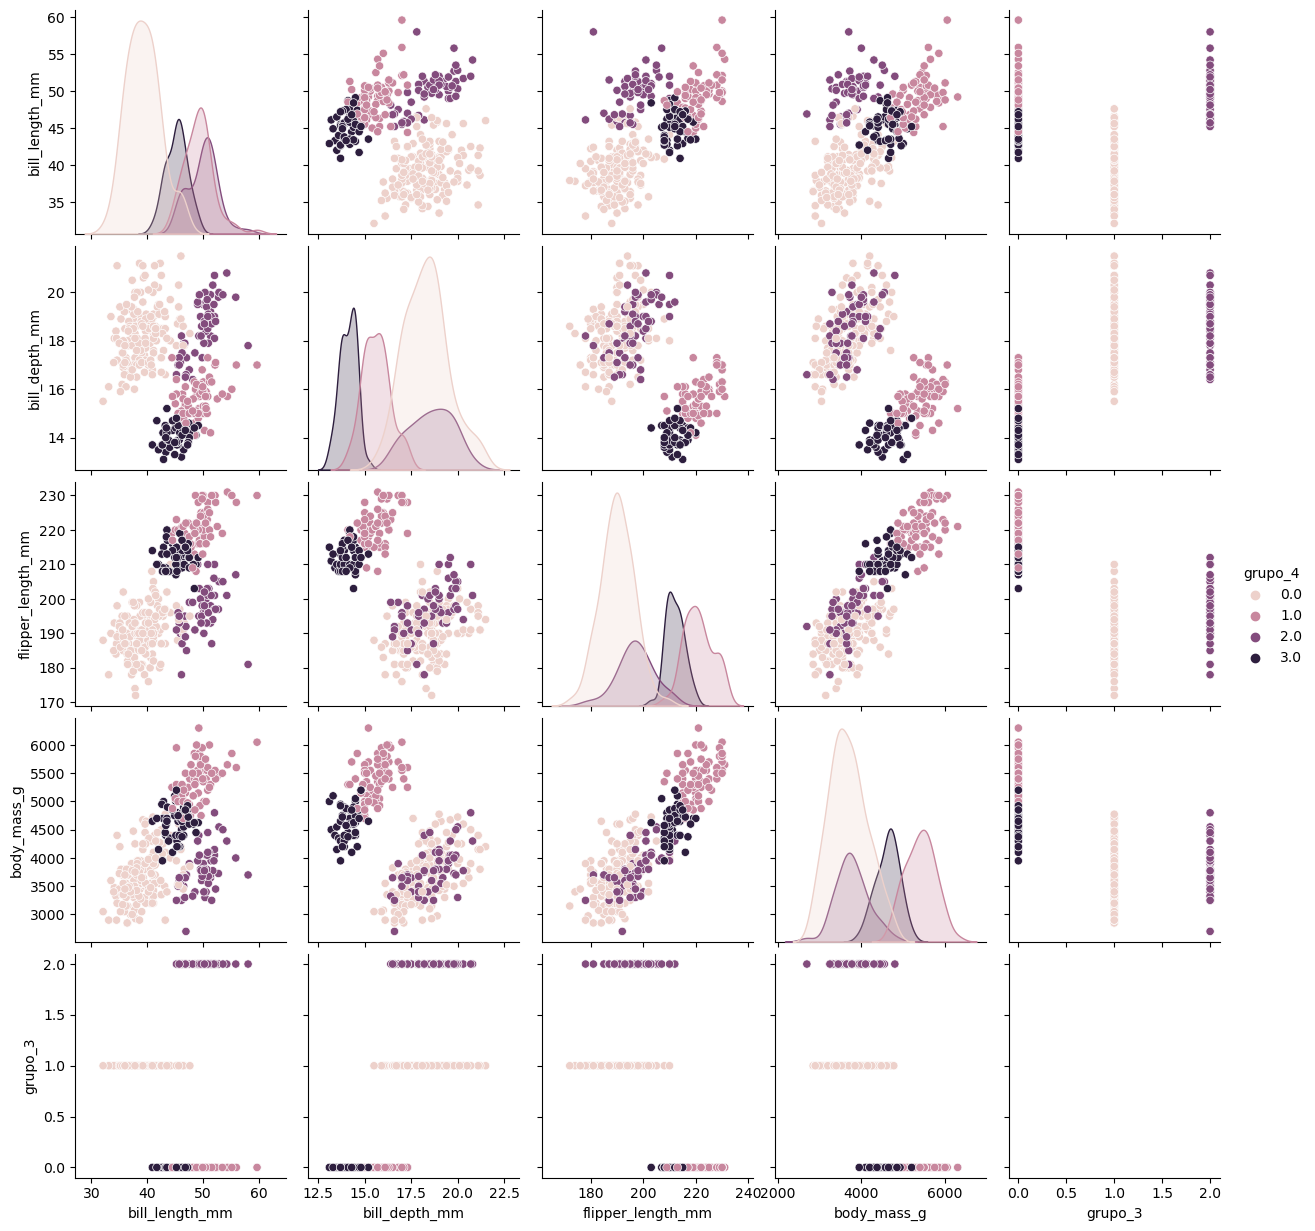

In [15]:
sns.pairplot(penguins, hue='grupo_4')

In [16]:
pd.crosstab(penguins['species'], penguins['grupo_4'])

grupo_4,0.0,1.0,2.0,3.0
species,,,,
Adelie,151,0,0,0
Chinstrap,14,0,54,0
Gentoo,0,71,0,52


In [17]:
pd.crosstab([penguins['species'], penguins['sex']], penguins['grupo_4'])

grupo_4           0.0  1.0  2.0  3.0
species   sex                       
Adelie    Female   73    0    0    0
          Male     73    0    0    0
Chinstrap Female   14    0   20    0
          Male      0    0   34    0
Gentoo    Female    0    9    0   49
          Male      0   61    0    0

### Análise 4 Grupos:

 - As especies Adelie e Chinstrap ficaram definidas nos grupos da mesma forma que com 3 grupos.
 - A especie Gentoo acrescentou a diferenciação de sexo, a especie esta bem definida mas o sexo não esta totalmente nos grupos adequados.